In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.shape

(150, 5)

In [4]:
df = df.rename(columns = {'sepal.length':'sepal_length','sepal.width':'sepal_width','petal.length':'petal_length','petal.width':'petal_width','variety':'class'})

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#Create dummy variables for target variable
dummy = pd.get_dummies(df['class'],prefix = 'class',prefix_sep = '_')

In [7]:
df = pd.concat([df,dummy],axis = 1)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_Setosa,class_Versicolor,class_Virginica
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0
3,4.6,3.1,1.5,0.2,Setosa,1,0,0
4,5.0,3.6,1.4,0.2,Setosa,1,0,0


In [9]:
#Selecting features and target variables
#Extracting depending and independent variables
x = df.iloc[:,1:4].values
y = df.iloc[:,5:].values

In [10]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [11]:
#LinearRegrerssion
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)

In [12]:
y_pred


array([[-8.74522032e-02,  1.14324076e-01,  9.73128127e-01],
       [ 8.65518807e-02,  7.99077176e-01,  1.14370944e-01],
       [ 1.16712315e+00, -1.77974213e-01,  1.08510582e-02],
       [-1.98738513e-01,  5.77488903e-01,  6.21249611e-01],
       [ 9.29594405e-01,  1.79309769e-01, -1.08904175e-01],
       [-1.13592977e-01,  2.97908100e-02,  1.08380217e+00],
       [ 9.80301147e-01,  5.28092980e-02, -3.31104455e-02],
       [ 1.61179698e-01,  3.23642474e-01,  5.15177828e-01],
       [ 7.23529308e-02,  5.15484681e-01,  4.12162389e-01],
       [ 2.19308362e-01,  4.07888497e-01,  3.72803142e-01],
       [-1.18854661e-01,  7.53477091e-01,  3.65377570e-01],
       [ 2.22764035e-01,  2.43013086e-01,  5.34222880e-01],
       [ 1.11117849e-01,  5.88043438e-01,  3.00838713e-01],
       [ 9.54947954e-02,  4.31246781e-01,  4.73258424e-01],
       [ 1.16927538e-01,  4.54038700e-01,  4.29033762e-01],
       [ 1.01261148e+00,  1.21472300e-01, -1.34083785e-01],
       [ 1.40069402e-01,  3.69800801e-01

In [15]:
print(f'Coefficients : \n {regressor.coef_}')

Coefficients : 
 [[ 0.27564877 -0.1700973  -0.10877595]
 [-0.42262572  0.19183408 -0.45871083]
 [ 0.14697694 -0.02173679  0.56748677]]


In [16]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)
print(f"Mean Squared Error : \n {mse:.2f}")
print(f"Mean absolute error : \n {mae:.2f}")
print(f"Coefficient of Determination: \n {r2s:.2f}")

Mean Squared Error : 
 0.09
Mean absolute error : 
 0.23
Coefficient of Determination: 
 0.57


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


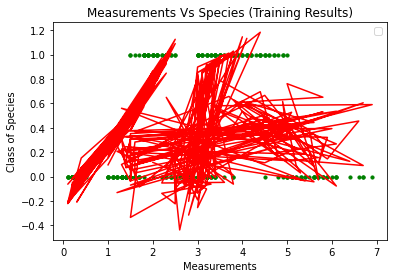

In [20]:
#Plotting for Training set
plt.title("Measurements Vs Species (Training Results)")
plt.xlabel("Measurements")
plt.ylabel("Class of Species")
plt.scatter(x_train,y_train,color="green",s = 10)
plt.plot(x_train,x_pred,color ="red")
plt.legend(loc='upper right')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


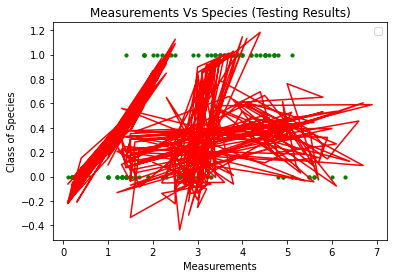

In [21]:
#Plotting for Test Results
plt.title("Measurements Vs Species (Testing Results)")
plt.xlabel("Measurements")
plt.ylabel("Class of Species")
plt.scatter(x_test,y_test,color="green",s = 10)
plt.plot(x_train,x_pred,color ="red")
plt.legend(loc='upper right')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


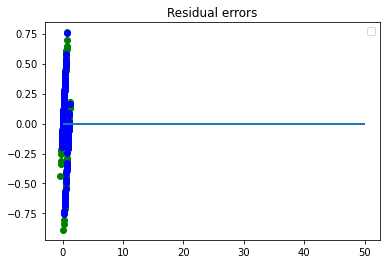

In [24]:
plt.title("Residual errors")
plt.scatter(x_pred,x_pred-y_train,color = 'green')
plt.scatter(y_pred,y_pred-y_test,color = 'blue')
plt.hlines(y = 0,xmin = 0,xmax = 50,linewidth = 2)
plt.legend(loc = 'upper right')
plt.show()